# Quantum circuits

![Animated cartoon of a quantum circuit.](images/quantum-circuits/hero.gif)

This lesson introduces the *quantum circuit* model of computation, a standard description of quantum computation that we'll use throughout this series.

We'll also introduce a few important mathematical concepts, including *inner products* between vectors, the notions of *orthogonality* and *orthonormality*, and *projections* and *projective measurements*, which generalize standard basis measurements.
Through these concepts, we will derive fundamental limitations on quantum information, including the *no-cloning theorem* and the impossibility to perfectly discriminate non-orthogonal quantum states.

## 1. Circuits

You likely already have some familiarity with *electrical* circuits, whether replacing a blown fuse or charging the device used to read this text. Electrical circuits have *wires* which allow for the flow of electricity, as well as various *components* like batteries or transistors, which manipulate the flow of electricity as it passes through. 

In computer science, *circuits* are models of computation that are loosely based on the real-life picture of electrical circuits. Instead of electricity, *information* is carried by wires through a network of *gates*, analogous to electrical components . Gates are operations that transform the information carried by the wires. By passing wires through a suitable arrangement of gates, one can construct an enormous variety of transformations.

You may have seen or heard about quantum circuits even prior to this course. Quantum circuits are just one example of a model of computation based on this more general concept. For example, one can construct circuits for manipulating *classical* information as well, and indeed this forms the basis for much of conventional computation.

Although the word "circuit" often refers to a circular path, circular paths aren't actually allowed in the most common circuit models of computation.
That is to say, we usually study *acyclic circuits* when we're thinking about circuits as computational models. A definite *input* is specified at the beginning of the circuit, and a unique *output* is produced on the other end. 
Quantum circuits follow this pattern; although we could run a quantum circuit as many times as we like, a quantum circuit itself represents a finite sequence of operations that cannot contain feedback loops.

### 1.1 Boolean circuits

To illustrate these ideas, let's begin with a simple example. A *Boolean circuit* is one in which the output is a single classical bit (though the input could be many bits). Here is an example:

![Example of a Boolean circuit](images/quantum-circuits/Boolean-circuit-XOR.png)

The wires, represented by lines, carry binary values, i.e., bits of information. The gates, represented by labelled squares, are *Boolean logic operations*. These are operations which, given one or more input wires, output a single wire. As with circuits, the designation "Boolean" indicates a single binary output, but more general logic operations, with multiple output wires, are also possible. 

The flow of information along the wires goes from left to right. The wires on the leftmost side of the figure, labeled $\mathsf{X}$ and $\mathsf{Y}$, are the input bits, which can each be set to whatever binary value we choose. The wire on the right-hand side is the output, which is completely determined by the input and cannot be specified separately. Traveling along any wire, the value (0 or 1) stays the same, only changing when passing through a gate. Wherever two wires intersect, we use a filled-in dot to denote the wires being *connected*. If two wires cross with no dot, then the wires simply pass over one another, not affecting each other in any way. Other conventions exist, and sometimes a gap or a small loop is used to indicate unconnected crossing wires.

![Alternate notation disconnected wires](images/quantum-circuits/unconnected-wires.png)

For consistency, any connected wires must have the same binary value. It is interesting to note that, in the context of electrical circuits, having two wires with different "values" (voltages) can cause overheating and melting. 

The three types of gates shown in the circuit above are the AND ($\wedge$), OR ($\vee$), and NOT ($\neg$) gates.
The functions computed by these gates matches what is expected from their colloquial meaning, and will likely be familiar to many readers. But here they are, represented by a tables of values or "truth table":

$$
\rule[-10mm]{0mm}{15mm}
\begin{array}[t]{c|c}
  a & \neg a\\
  \hline
  0 & 1\\
  1 & 0
\end{array}
\hspace{1.5cm}
\begin{array}[t]{c|c}
  ab & a \wedge b\\
  \hline
  00 & 0\\
  01 & 0\\
  10 & 0\\
  11 & 1
\end{array}
\hspace{1.5cm}
\begin{array}[t]{c|c}
  ab & a \vee b\\
  \hline
  00 & 0\\
  01 & 1\\
  10 & 1\\
  11 & 1
\end{array}
$$

The label "truth table" comes from the helpful identification of 1 and 0 with "TRUE" and "FALSE" respectively. Thus, the NOT gate flips 0 to 1 and vice versa, because NOT FALSE = TRUE and NOT TRUE = FALSE. Similarly, TRUE AND FALSE = FALSE, so the AND gate outputs 0 with inputs 10. See if you can understand the other rows of the tables above using this reasoning. 

The two small circles on the wires just to the right of the names $\mathsf{X}$ and $\mathsf{Y}$ represent *fanout* operations, which simply creates multple copies of a wire with the same value as the input.
Fanout operations are not always considered to be gates in the classical setting — sometimes they are treated as if they are "free" in some sense — but when we discuss how ordinary Boolean circuits can be converted into equivalent quantum circuits, we must classify fanout operations explicitly as gates to account for them correctly.

Here is the same circuit illustrated in a style more common in electrical engineering, which uses conventional symbols for the AND, OR, and NOT gates:

![Boolean circuit in a classic style](images/quantum-circuits/Boolean-circuit-classic.png)

We won't use this style or these particular gate symbols further, but you may encounter this notation in other contexts, and it's helpful to be aware.

The particular circuit in this example computes the *exclusive-OR* (or XOR for short), which is denoted by the symbol $\oplus$. Here is the "truth table" for XOR:

$$
\rule[-10mm]{0mm}{15mm}
\begin{array}[t]{c|c}
  ab & a \oplus b\\
  \hline
  00 & 0\\
  01 & 1\\
  10 & 1\\
  11 & 0
\end{array}
$$

This gate outputs 1 (TRUE) only if "exclusively" one of the inputs is 1 (TRUE).  

In the following diagram, we consider just one possible selection of the inputs: $\mathsf{X}=0$ and $\mathsf{Y}=1$.
Each wire is labeled by the value it carries so that you can follow the operations.

![Evaluating a Boolean circuit](images/quantum-circuits/XOR-circuit-evaluate.png)

The output value is $1$ in this case, which is the correct value for the XOR: $0 \oplus 1 = 1$. You can check the other three possible input settings in a similar way.

### 1.2 Other types of circuits

The notion of a circuit in computer science is quite general.
For example, circuits whose wires carry values other than $0$ and $1$ are sometimes studied, as are gates representing different choices of operations.

In *arithmetic circuits*, for instance, the wires may carry integer values and the gates may represent arithmetic operations, such as addition and multiplication.
The following figure depicts an arithmetic circuit that takes two variable input values (labeled $x$ and $y$) as well as a third input set to the value $1$.

![Example arithmetic circuit](images/quantum-circuits/arithmetic-circuit.png)

The values carried by the wires, as functions of the values $x$ and $y$, are shown in the figure. We could also consider circuits that incorporate randomness, such as ones where gates represent probabilistic operations. You've already seen that such operations can be represented by stochastic matrices. Thus, for probabilistic circuits, wires carry probability vectors and gates represent stochastic operations.

### 1.3 Quantum circuits

In the quantum circuit model, wires represent qubits and gates represent operations acting on these qubits.
We'll focus for now on operations we have encountered so far, namely *unitary operations* and *standard basis measurements*.
As we learn about other sorts of quantum operations and measurements, we'll enhance our model accordingly.

Here's a simple example of a quantum circuit:

![Simple quantum circuit](images/quantum-circuits/simple-quantum-circuit.png)

In this circuit, we have a single qubit named $\mathsf{X}$, which is represented by the horizontal line, and a sequence of gates representing unitary operations on this qubit.
Just like in the examples above, the flow of information goes from left to right — so the first operation performed is a Hadamard, the second is an $S$ operation, the third is another Hadamard, and the final operation is a $T$ operation.
Applying the entire circuit therefore applies the composition of these operations, $THSH$, to the qubit $\mathsf{X}$. 

Careful, notice that the order in which we wrote the operations $THSH$ is reversed compared to the circuit, because in linear algebra we typically apply operations on the left, whereas for circuits it's on the right. The actual order of operations remains the same, e.g., $H$ is applied first.

Sometimes we wish to explicitly indicate the input or output states to a circuit.
For example, if we apply the operation $THSH$ to the state $\vert 0\rangle$, we obtain the state
$\frac{1+i}{2}\vert 0\rangle + \frac{1}{\sqrt{2}} \vert 1 \rangle$. We may indicate this as follows:

![Simple quantum circuit evaluated](images/quantum-circuits/simple-quantum-circuit-evaluated.png)

Quantum circuits often have all qubits initialized to $\vert 0\rangle$, as we have in this case, but there are also cases where we wish to set the input qubits to different states.

We can construct this circuit in Qiskit. Here is how:

In [1]:
from qiskit import QuantumCircuit

# Make an empty quantum circuit with one qubit
circuit = QuantumCircuit(1)

# Add gates
circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)

# Draw the circuit
circuit.draw()

┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

The argument 1 passed to `QuantumCircuit` refers to the number of qubits (wires) in our circuit. The qubits are indexed starting from zero, so our single wire is actually the "zeroth" qubit. Hence the argument of `0` in the code above. The default names for qubits in Qiskit are $\mathsf{q_0}$, $\mathsf{q_1}$, $\mathsf{q_2}$, etc., and when there is just a single qubit like in our example, the default name is $\mathsf{q}$ rather than $\mathsf{q_0}$.
If we wish to choose our own name, we use the `QuantumRegister` class like this:

In [10]:
from qiskit import QuantumCircuit, QuantumRegister

# Create register with one qubit, labelled x
X = QuantumRegister(1, "x")

# Create circuit out of this register
circuit = QuantumCircuit(X)

#Proceed as before
circuit.h(X)
circuit.s(X)
circuit.h(X)
circuit.t(X)
circuit.draw()

┌───┐┌───┐┌───┐┌───┐
x: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

Here the qubit is given the name $\mathsf{x}$ (lower case); in Qiskit, valid names for qubits (or *registers* more generally, which are collections of qubits) must start with a lowercase letter.

Here is another example of a quantum circuit, this time with two qubits:

![Quantum circuit that creates an ebit](images/quantum-circuits/ebit-circuit.png)

As always, the gate labeled $H$ refers to a Hadamard operation, while the second gate is a two-qubit gate. It's the *controlled-NOT* operation, where the solid circle represents the *control* qubit and the circle resembling the symbol $\oplus$ denotes the *target* qubit. Sometimes, "controlled-NOT" is shortened to "CNOT" or "C-NOT." In words, the controlled-NOT applies a NOT gate to the target qubit exactly when the control qubit has value 1. Hence, the control qubit "controls" the application of a NOT gate to the target. More general control gates are frequently encountered in quantum computing, and will be briefly discussed below.

Before examining this circuit in greater detail and explaining what it does, it is imperative that we clarify how qubits are ordered in quantum circuits.

<!-- ::: q-block.note.info -->

**Ordering of qubits in quantum circuits:**
Throughout this textbook (and in Qiskit), going from top to bottom in a circuit corresponds to going *right to left* in the Cartesian or tensor product, contrary to reading conventions in many languages (including English). The topmost qubit in a circuit has index 0, and corresponds to the rightmost position in a Cartesian or tensor product. The second-to-top qubit has index 1, and corresponds to the position second-from-right, and so on, down to the bottommost qubit, which has the highest index, and corresponds to the leftmost position in the Cartesian or tensor product.

Thus, when we refer to the qubit in the zeroth position, we're referring to the topmost qubit in a circuit diagram or the rightmost qubit in the expression of a quantum state vector. This indexing convention is known as *little-endian indexing*, because the index starts at the "little end", when we think about the significance of bits in binary representations of numbers, or of digits in standard decimal notation. 

<!-- ::: -->

Thus, in the circuit above, we are considering the circuit to be an operation on two qubits $(\mathsf{X},\mathsf{Y})$.
If the input is $\vert \psi\rangle \vert \phi\rangle$, then the lower qubit ($\mathsf{X}$) starts in the state $\vert \psi\rangle$, and the upper qubit ($\mathsf{Y}$) starts in the state $\vert \phi\rangle$.

Now let's look at the circuit itself, moving from left to right through its operations, to see what it does.

1. The first operation is a Hadamard operation on $\mathsf{Y}$:

   ![First operation e-bit creator](images/quantum-circuits/ebit-circuit-first.png)

   When applying a gate to a single qubit like this, nothing happens to the other qubits; nothing happening is equivalent to the identity operation. In our circuit there is just one other qubit, $\mathsf{X}$, so the dotted rectangle in the figure above represents this operation:

   $$
     \mathbb{1}\otimes H
     = \begin{pmatrix}
         1 & 0 \\
         0 & 1
     \end{pmatrix} \otimes \frac{1}{\sqrt{2}}\begin{pmatrix}
         1 & 1 \\
         1 & -1
     \end{pmatrix} = 
     \begin{pmatrix}
     \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 & 0\\
     \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 & 0\\
     0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\
     0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
     \end{pmatrix}.
   $$

   Note that the identity matrix is on the left of the tensor product and $H$ is on the right. This is consistent with Qiskit's qubit ordering.

1. The second operation is the controlled-NOT operation, where $\mathsf{Y}$ is the control and $\mathsf{X}$ is the target:

   ![Second operation e-bit creator](images/quantum-circuits/ebit-circuit-second.png)

   The controlled-NOT gate's action on standard basis states is given by

   ![Controlled-NOT gate](images/quantum-circuits/cNOT.png)
   
   and also by the table
   
   $$
    \rule[-10mm]{0mm}{15mm}
    \begin{array}[t]{c|c}
      ab & (a\oplus b)b\\
      \hline
      00 & 00\\
      01 & 11\\
      10 & 10\\
      11 & 01
    \end{array}.
   $$

   Given our qubit ordering convention, the matrix representation of the controlled-NOT gate is this:

   $$
     \begin{pmatrix}
     1 & 0 & 0 & 0\\[2mm]
     0 & 0 & 0 & 1\\[2mm]
     0 & 0 & 1 & 0\\[2mm]
     0 & 1 & 0 & 0
     \end{pmatrix}.
   $$

The unitary operation of the entire circuit, which we'll call $U$, is the composition of the operations:

$$
U = \begin{pmatrix}
1 & 0 & 0 & 0\\[2mm]
0 & 0 & 0 & 1\\[2mm]
0 & 0 & 1 & 0\\[2mm]
0 & 1 & 0 & 0
\end{pmatrix}
\begin{pmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 & 0\\
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 & 0\\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\
0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
\end{pmatrix}
=
\begin{pmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 & 0\\
0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}\\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 & 0
\end{pmatrix}.
$$

In particular, recalling our notation for the Bell states,

$$
\begin{aligned}
  \vert \phi^+ \rangle & = \frac{1}{\sqrt{2}} \vert 0 0 \rangle 
                         + \frac{1}{\sqrt{2}} \vert 1 1 \rangle \\[1mm]
  \vert \phi^- \rangle & = \frac{1}{\sqrt{2}} \vert 0 0 \rangle 
                         - \frac{1}{\sqrt{2}} \vert 1 1 \rangle \\[1mm]
  \vert \psi^+ \rangle & = \frac{1}{\sqrt{2}} \vert 0 1 \rangle 
                         + \frac{1}{\sqrt{2}} \vert 1 0 \rangle \\[1mm]
  \vert \psi^- \rangle & = \frac{1}{\sqrt{2}} \vert 0 1 \rangle 
                         - \frac{1}{\sqrt{2}} \vert 1 0 \rangle,
\end{aligned}
$$

we get that

$$
\begin{aligned}
U \vert 00\rangle & = \vert \phi^+\rangle\\
U \vert 01\rangle & = \vert \phi^-\rangle\\
U \vert 10\rangle & = \vert \psi^+\rangle\\
U \vert 11\rangle & = -\vert \psi^-\rangle.
\end{aligned}
$$

Interestingly, this simple circuit gives us a way to create the entangled state $\vert\phi^+\rangle$ if we run it on two qubits initially in the unentangled product state $\vert 00\rangle$. More generally, it gives us a way to convert the standard basis to the Bell basis.
(If we wanted, the $-1$ phase factor on the last state, $-\vert \psi^-\rangle$ could be eliminated, for instance, by adding a controlled-$Z$ gate at the beginning or a swap gate at the end.)

In general, quantum circuits can contain any number of qubit wires. We may also include classical bit wires, which are indicated by double lines like in this example:

![Example circuit with measurements](images/quantum-circuits/ebit-circuit-measured.png)

In this circuit we have a Hadamard gate and a controlled-NOT gate on two qubits $\mathsf{X}$ and $\mathsf{Y},$ just like in the previous example.
We also have two *classical* bits, $\mathsf{A}$ and $\mathsf{B}$, as well as two measurement gates.
The measurement gates represent standard basis measurements:
the qubits are changed into their post-measurement states, while the measurement outcomes are *overwritten* onto the classical bits to which the arrows point.

We can construct this circuit in Qiskit by using the `ClassicalRegister` class to represent the classical bits. These will store the measurement results of each qubit. Here is the code:

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Create two single-qubit registers
X = QuantumRegister(1, "x")
Y = QuantumRegister(1, "y")

# Create two single-bit classical registers
A = ClassicalRegister(1, "a")
B = ClassicalRegister(1, "b")

# Create an empty circuit with all four registers
circuit = QuantumCircuit(Y, X, B, A)

# Apply gates
circuit.h(Y)
circuit.cx(Y, X)

# Measure qubits and record results on classical bits
circuit.measure(Y, B)
circuit.measure(X, A)

# Draw result
circuit.draw()

┌───┐     ┌─┐   
  y: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
  x: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
b: 1/═══════════╩══╬═
                0  ║ 
                   ║ 
a: 1/══════════════╩═
                   0

With measurements in place, we can actually execute the circuit. We will use `AerSimulator`, which simulates the results one should see on an ideal quantum computer. We also use `plot_histogram` to visualize the measurement counts.

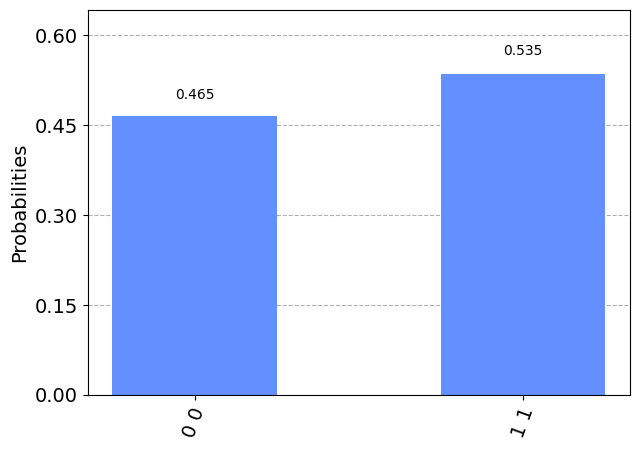

In [2]:
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

# Create quantum simulator
simulator = AerSimulator()

# Execute the circuit 1000 times
circuit_simulator = simulator.run(circuit, shots=1000)

# Obtain the set of results for all 1000 executions
statistics = circuit_simulator.result().get_counts()

# Plot a histogram of the results
plot_histogram(statistics)

Notice that the number of counts is approximately half for 00, half for 11. This matches our expectation for the first Bell state, as can be seen from the Born rule.

Sometimes, it is more convenient to depict a measurement as a gate that takes a qubit as input and outputs a classical bit.
In this case, the measured qubit is discarded and can safely be ignored thereafter. For example, the following circuit represents the same process as above, but where we ignore $\mathsf{X}$ and $\mathsf{Y}$ after measuring them:

![Example circuit with measurements compact](images/quantum-circuits/ebit-circuit-measured-compact.png)

As the series continues, we will see many more examples of quantum circuits, which will usually be more complicated than the simple examples above.
Here are some symbols for common gates:


- Single-qubit gates are typically shown as squares, with a letter indicating which operation it is, like this:
    
  ![Single-qubit gates](images/quantum-circuits/single-qubit-gates.png)

- NOT gates (also known as $X$ gates), being rather special, are sometimes denoted by a circle around a plus sign:

  ![Not gate](images/quantum-circuits/not-gate.png)

- Swap gates are denoted as follows:

  ![Swap gate](images/quantum-circuits/swap-gate.png)

-  Controlled-gates are denoted by a filled-in circle (indicating the control) connected by a vertical line to whatever operation is being controlled. For instance, controlled-NOT gates, controlled-controlled-NOT (or Toffoli) gates, and controlled-swap (Fredkin) gates are denoted like this:
   
  ![Controlled gate](images/quantum-circuits/controlled-gates.png)

- Arbitrary unitary operations on multiple qubits may be viewed as gates. They are depicted by rectangles labeled by the name of the unitary operation. For instance, here is a depiction of an (unspecified) unitary operation $U$ as a gate, along with a controlled version of this gate:

  ![Arbitrary unitary gate together with controlled version](images/quantum-circuits/uncontrolled-and-controlled-unitary.png)

## 2. Inner products, orthonormality, and projections

To better prepare ourselves to explore the capabilities and limitations of quantum circuits, we now introduce some additional mathematical concepts — namely the *inner product* between vectors (and its connection to the Euclidean norm), the notions of *orthogonality* and *orthonormality* for sets of vectors, and *projection* matrices, which will allow us to introduce a handy generalization of standard basis measurements.

### 2.1 Inner products

Recall from Lesson 1 that when we use the Dirac notation to refer to an arbitrary column vector as a ket, such as

$$
\vert \psi \rangle =
\begin{pmatrix}
\alpha_1\\
\alpha_2\\
\vdots\\
\alpha_n
\end{pmatrix},
$$

the corresponding bra vector is the *conjugate transpose* of this vector:

$$
\langle \psi \vert = \bigl(\vert \psi \rangle \bigr)^{\dagger}
=
\begin{pmatrix}
\overline{\alpha_1} & \overline{\alpha_2} & \cdots & \overline{\alpha_n}
\end{pmatrix}.
\tag{1}
$$

Alternatively, if we have some classical state set $\Sigma$ in mind, and we express a column vector as a ket,
such as

$$
\vert \psi \rangle = \sum_{a\in\Sigma} \alpha_a \vert a \rangle,
$$

then the corresponding row (or bra) vector is the conjugate transpose

$$
\langle \psi \vert = \sum_{a\in\Sigma} \overline{\alpha_a} \langle a \vert.
\tag{2}
$$

We also observed that the product of a bra vector and a ket vector, viewed as matrices either having a single row or a single column, results in a scalar (meaning a single complex number, in contrast to a vector).
Specifically, if we have two (column) vectors

$$
\vert \psi \rangle =
\begin{pmatrix}
\alpha_1\\
\alpha_2\\
\vdots\\
\alpha_n
\end{pmatrix}
\quad\text{and}\quad
\vert \phi \rangle =
\begin{pmatrix}
\beta_1\\
\beta_2\\
\vdots\\
\beta_n
\end{pmatrix},
$$

so that the row vector $\langle \psi \vert$ is as in equation $(1)$, then 

$$
\langle \psi \vert \phi \rangle = \langle \psi \vert \vert \phi \rangle
=
\begin{pmatrix}
\overline{\alpha_1} & \overline{\alpha_2} & \cdots & \overline{\alpha_n}
\end{pmatrix}
\begin{pmatrix}
\beta_1\\
\beta_2\\
\vdots\\
\beta_n
\end{pmatrix}
=
\overline{\alpha_1} \beta_1 + \cdots + \overline{\alpha_n}\beta_n.
$$

Alternatively, if we have two column vectors that we have written as 

$$
\vert \psi \rangle = \sum_{a\in\Sigma} \alpha_a \vert a \rangle
\quad\text{and}\quad
\vert \phi \rangle = \sum_{b\in\Sigma} \beta_b \vert b \rangle,
$$

so that $\langle \psi \vert$ is the row vector $(2)$, we find that

$$
\begin{aligned}
  \langle \psi \vert \phi \rangle & = \langle \psi \vert \vert \phi \rangle\\
  & =
  \Biggl(\sum_{a\in\Sigma} \overline{\alpha_a} \langle a \vert\Biggr)
  \Biggl(\sum_{b\in\Sigma} \beta_b \vert b\rangle\Biggr)\\
  & =
  \sum_{a\in\Sigma}\sum_{b\in\Sigma} \overline{\alpha_a} \beta_b \langle a \vert b \rangle\\
  & = \sum_{a\in\Sigma} \overline{\alpha_a} \beta_a,
\end{aligned}
$$

where the last equality follows from the observation that $\langle a \vert a \rangle = 1$ and $\langle a \vert b \rangle = 0$ for classical states $a$ and $b$ satisfying $a\not=b$.

The value $\langle \psi \vert \phi \rangle$ is called the *inner product* between the vectors $\vert \psi\rangle$ and $\vert \phi \rangle$.
Inner products are critically important in quantum information and computation;
we would not get far in understanding quantum information without this fundamental notion.

Let us now collect some basic facts about inner products.

1. **Relationship to the Euclidean norm.** The inner product of any vector

   $$
   \vert \psi \rangle = \sum_{a\in\Sigma} \alpha_a \vert a \rangle
   $$

   with itself is
      
   $$
   \langle \psi \vert \psi \rangle 
   = \sum_{a\in\Sigma} \overline{\alpha_a} \alpha_a 
   = \sum_{a\in\Sigma} \vert\alpha_a\vert^2 
   = \bigl\| \vert \psi \rangle \bigr\|^2.
   $$

   Thus, the Euclidean norm of a vector may alternatively be expressed as

   $$
   \bigl\| \vert \psi \rangle \bigr\| = \sqrt{ \langle \psi \vert \psi \rangle }.
   $$

   Notice that the Euclidean norm of a vector must always be a nonnegative real number.
   Moreover, the only way the Euclidean norm of a vector can be equal to zero is if every one of the entries is equal to zero, which is to say that the vector is the zero vector. 

   We can summarize these observations like this: for every vector $\vert \psi \rangle$ we have

   $$
   \langle \psi \vert \psi \rangle \geq 0,
   $$

   with $\langle \psi \vert \psi \rangle = 0$ if and only if $\vert \psi \rangle = 0$.
   This property of the inner product is sometimes referred to as _positive definiteness_.

2. **Conjugate symmetry.** For any two vectors

   $$
   \vert \psi \rangle = \sum_{a\in\Sigma} \alpha_a \vert a \rangle
   \quad\text{and}\quad
   \vert \phi \rangle = \sum_{b\in\Sigma} \beta_b \vert b \rangle,
   $$

   we have

   $$
   \langle \psi \vert \phi \rangle = \sum_{a\in\Sigma} \overline{\alpha_a} \beta_a
   \quad\text{and}\quad
   \langle \phi \vert \psi \rangle = \sum_{a\in\Sigma} \overline{\beta_a} \alpha_a,
   $$

   and therefore

   $$
   \overline{\langle \psi \vert \phi \rangle} = \langle \phi \vert \psi \rangle.
   $$

3. **Linearity in the second argument (and conjugate linearity in the first).**
   Let us suppose that $\vert \psi \rangle$, $\vert \phi_1 \rangle$, and $\vert \phi_2 \rangle$ are vectors and $\alpha_1$ and $\alpha_2$ are complex numbers. If we define a new vector
     
   $$
   \vert \phi\rangle = \alpha_1 \vert \phi_1\rangle + \alpha_2 \vert \phi_2\rangle,
   $$

   then

   $$
   \langle \psi \vert \phi \rangle
   = \langle \psi \vert \bigl( \alpha_1\vert \phi_1 \rangle + \alpha_2\vert \phi_2 \rangle\bigr)
   = \alpha_1 \langle \psi \vert \phi_1 \rangle + \alpha_2 \langle \psi \vert \phi_2 \rangle.
   $$ 

   That is to say, the inner product is _linear_ in the second argument.
   This can be verified either through the formulas above or simply by noting that matrix multiplication is linear in each argument (and specifically in the second argument).
    
   Combining this fact with conjugate symmetry reveals that the inner product is _conjugate linear_ in the first argument. That is, if $\vert \psi_1 \rangle$, $\vert \psi_2 \rangle$, and $\vert \phi \rangle$ are vectors and $\alpha_1$ and $\alpha_2$ are complex numbers, and we define

   $$
   \vert \psi \rangle = \alpha_1 \vert \psi_1\rangle + \alpha_2 \vert \psi_2 \rangle,
   $$

   then

   $$
   \langle \psi \vert \phi \rangle
   = 
   \bigl( \overline{\alpha_1} \langle \psi_1 \vert + \overline{\alpha_2} \langle \psi_2 \vert \bigr) 
   \vert\phi\rangle
   = \overline{\alpha_1} \langle \psi_1 \vert \phi \rangle + \overline{\alpha_2} \langle \psi_2 \vert \phi \rangle.
   $$ 

4. **The Cauchy–Schwarz inequality.**
   For every choice of vectors $\vert \phi \rangle$ and $\vert \psi \rangle$ having the same number of entries, we have

   $$
   \bigl\vert \langle \psi \vert \phi \rangle\bigr| \leq \bigl\| \vert\psi \rangle \bigr\| \bigl\| \vert \phi \rangle
   \bigr\|.
   $$

   This is an incredibly handy inequality that gets used quite extensively in quantum information (and in many other fields of study).

### 2.2 Orthogonal and orthonormal sets

Two vectors $\vert \phi \rangle$ and $\vert \psi \rangle$ are said to be *orthogonal* if their inner product is zero:

$$
\langle \psi \vert \phi \rangle = 0.
$$

Geometrically, we can think about orthogonal vectors as arrows emanating from the origin and forming right angles to each other.

A set of vectors $\{ \vert \psi_1\rangle,\ldots,\vert\psi_m\rangle\}$ is called an *orthogonal set* if every vector in the set is orthogonal to every other vector in the set.
That is, this set is orthogonal if

$$
\langle \psi_j \vert \psi_k\rangle = 0
$$

for all choices of $j,k\in\{1,\ldots,m\}$ for which $j\not=k$.

A set of vectors $\{ \vert \psi_1\rangle,\ldots,\vert\psi_m\rangle\}$ is called an *orthonormal* set if it is an orthogonal set and, in addition, every vector in the set is a unit vector.
Alternatively, this set is an orthonormal set if we have

$$
\langle \psi_j \vert \psi_k\rangle =
\begin{cases}
1 & j = k\\
0 & j\not=k
\end{cases}
\tag{3}
$$

for all choices of $j,k\in\{1,\ldots,m\}$.

Finally, a set $\{ \vert \psi_1\rangle,\ldots,\vert\psi_m\rangle\}$ which is both orthonormal and a basis called an *orthonormal basis*.
From linear algebra, this is equivalent to $\{ \vert \psi_1\rangle,\ldots,\vert\psi_m\rangle\}$ being an orthonormal set and $m$ being equal to the dimension of the vector space.

Here are some examples of orthonormal bases we have already encountered:

* For any classical state set $\Sigma$, the set of all standard basis vectors
    $$
        \big\{ \vert a \rangle \,:\, a\in\Sigma\bigr\}
    $$

    is an orthonormal basis.
    
* The set $\{\vert+\rangle,\vert-\rangle\}$ is an orthonormal basis for the two-dimensional vector space of a single qubit. 

* The Bell basis $\{\vert\phi^+\rangle, \vert\phi^-\rangle, \vert\psi^+\rangle, \vert\psi^-\rangle\}$ is an orthonormal basis for the four-dimensional space of two qubits.

#### Extending orthonormal sets to orthonormal bases

Any set of orthonormal vectors, whether or not it is a basis, can nevertheless be enlarged to span the whole space, thereby becoming a basis. More precisely, suppose that $\vert\psi_1\rangle,\ldots,\vert\psi_m\rangle$ are orthonormal vectors that live in an $n$-dimensional space. 
Orthonormal vectors are always linearly independent, so we must have $m \leq n$. No linearly independent set can have more than $n$ elements in an $n$-dimensional space. 

If $m = n$, then our orthonormal set is also a basis. In the case where $m<n$, it is always possible to choose an additional $n-m$ vectors
$\vert \psi_{m+1}\rangle,\ldots,\vert\psi_n\rangle$ so that
$\{\vert\psi_1\rangle,\ldots,\vert\psi_n\rangle\}$ forms an orthonormal basis.
A procedure known as the *Gram*&ndash;*Schmidt process* can be used to construct these vectors. For now, it suffices to know that such a procedure is possible. 

##### Orthonormal sets and unitary matrices

Orthonormal vectors are closely connected with unitary matrices.
One way to express this connection is to say that the following three statements are logically equivalent (meaning that they are all true or all false) for any choice of a square matrix $U$:

1. The matrix $U$ is unitary (i.e., $U^{\dagger} U = \mathbb{1} = U U^{\dagger}$).
2. The rows of $U$ form an orthonormal set.
3. The columns of $U$ form an orthonormal set.

To show this equivalence, let's think about how matrix multiplication and the conjugate transpose work.
Suppose, for instance, that we have a $3\times 3$ matrix like this:

$$
U = \begin{pmatrix}
\alpha_{1,1} & \alpha_{1,2} & \alpha_{1,3} \\
\alpha_{2,1} & \alpha_{2,2} & \alpha_{2,3} \\
\alpha_{3,1} & \alpha_{3,2} & \alpha_{3,3}
\end{pmatrix}
$$

The conjugate transpose of $U$ looks like this:

$$
U^{\dagger} = \begin{pmatrix}
\overline{\alpha_{1,1}} & \overline{\alpha_{2,1}} & \overline{\alpha_{3,1}} \\
\overline{\alpha_{1,2}} & \overline{\alpha_{2,2}} & \overline{\alpha_{3,2}} \\
\overline{\alpha_{1,3}} & \overline{\alpha_{2,3}} & \overline{\alpha_{3,3}}
\end{pmatrix}
$$

Multiplying the two matrices, with the conjugate transpose on the left-hand side, gives us this matrix:

$$
\begin{aligned}
&\begin{pmatrix}
\overline{\alpha_{1,1}} & \overline{\alpha_{2,1}} & \overline{\alpha_{3,1}} \\
\overline{\alpha_{1,2}} & \overline{\alpha_{2,2}} & \overline{\alpha_{3,2}} \\
\overline{\alpha_{1,3}} & \overline{\alpha_{2,3}} & \overline{\alpha_{3,3}}
\end{pmatrix}
\begin{pmatrix}
\alpha_{1,1} & \alpha_{1,2} & \alpha_{1,3} \\
\alpha_{2,1} & \alpha_{2,2} & \alpha_{2,3} \\
\alpha_{3,1} & \alpha_{3,2} & \alpha_{3,3}
\end{pmatrix}\\[2mm]
\qquad &=
{\scriptsize
\begin{pmatrix}
\overline{\alpha_{1,1}}\alpha_{1,1} + \overline{\alpha_{2,1}}\alpha_{2,1} + \overline{\alpha_{3,1}}\alpha_{3,1} &
\overline{\alpha_{1,1}}\alpha_{1,2} + \overline{\alpha_{2,1}}\alpha_{2,2} + \overline{\alpha_{3,1}}\alpha_{3,2} &
\overline{\alpha_{1,1}}\alpha_{1,3} + \overline{\alpha_{2,1}}\alpha_{2,3} + \overline{\alpha_{3,1}}\alpha_{3,3} \\[1mm]
\overline{\alpha_{1,2}}\alpha_{1,1} + \overline{\alpha_{2,2}}\alpha_{2,1} + \overline{\alpha_{3,2}}\alpha_{3,1} &
\overline{\alpha_{1,2}}\alpha_{1,2} + \overline{\alpha_{2,2}}\alpha_{2,2} + \overline{\alpha_{3,2}}\alpha_{3,2} &
\overline{\alpha_{1,2}}\alpha_{1,3} + \overline{\alpha_{2,2}}\alpha_{2,3} + \overline{\alpha_{3,2}}\alpha_{3,3} \\[1mm]
\overline{\alpha_{1,3}}\alpha_{1,1} + \overline{\alpha_{2,3}}\alpha_{2,1} + \overline{\alpha_{3,3}}\alpha_{3,1} &
\overline{\alpha_{1,3}}\alpha_{1,2} + \overline{\alpha_{2,3}}\alpha_{2,2} + \overline{\alpha_{3,3}}\alpha_{3,2} &
\overline{\alpha_{1,3}}\alpha_{1,3} + \overline{\alpha_{2,3}}\alpha_{2,3} + \overline{\alpha_{3,3}}\alpha_{3,3}
\end{pmatrix}}
\end{aligned}
$$

This looks messy, but we can simplify things by noticing that each entry looks like an inner product. Specifically, if we form three vectors from the columns of $U$, 

$$
\vert \psi_1\rangle = \begin{pmatrix}
\alpha_{1,1}\\
\alpha_{2,1}\\
\alpha_{3,1}
\end{pmatrix},
\quad
\vert \psi_2\rangle = \begin{pmatrix}
\alpha_{1,2}\\
\alpha_{2,2}\\
\alpha_{3,2}
\end{pmatrix},
\quad
\vert \psi_3\rangle =
\begin{pmatrix}
\alpha_{1,3}\\
\alpha_{2,3}\\
\alpha_{3,3}
\end{pmatrix},
$$

then we can alternatively express the product above as follows:

$$
U^{\dagger} U =
\begin{pmatrix}
\langle \psi_1\vert \psi_1 \rangle & \langle \psi_1\vert \psi_2 \rangle & \langle \psi_1\vert \psi_3 \rangle \\
\langle \psi_2\vert \psi_1 \rangle & \langle \psi_2\vert \psi_2 \rangle & \langle \psi_2\vert \psi_3 \rangle \\
\langle \psi_3\vert \psi_1 \rangle & \langle \psi_3\vert \psi_2 \rangle & \langle \psi_3\vert \psi_3 \rangle 
\end{pmatrix}
$$

Referring to the equation (3), we now see that the condition that this matrix is equal to the identity matrix is equivalent to the vectors $\vert\psi_1\rangle,\vert\psi_2\rangle,\vert\psi_3\rangle$ being orthonormal.

Though we considered $3 \times 3$ here, the argument generalizes to unitary matrices of any size. 
The fact that the rows of a matrix form an orthonormal basis if and only if the matrix is unitary then follows from the fact that a matrix $U$ is unitary if and only if its transpose $U^T$ is unitary. 

Given the equivalence described above, together with the fact that every orthonormal set can be extended to form an orthonormal basis, we conclude the following useful fact:
given any orthonormal set of vectors $\{\vert\psi_1\rangle,\ldots,\vert\psi_m\rangle\}$ drawn from an $n$-dimensional space, there exists a unitary matrix $U$ whose first $m$ columns are the vectors $\vert\psi_1\rangle,\ldots,\vert\psi_m\rangle$.
Pictorially, we can always find a unitary matrix having this form:

$$
U =
\left(
  \begin{array}{ccccccc}
    \rule{0.4pt}{10pt} & \rule{0.4pt}{10pt} & & \rule{0.4pt}{10pt} & \rule{0.4pt}{10pt} & & \rule{0.4pt}{10pt}\\
    \vert\psi_1\rangle & \vert\psi_2\rangle & \cdots & \vert\psi_m\rangle & \vert\psi_{m+1}\rangle & 
    \cdots & \vert\psi_n\rangle\\
    \rule{0.4pt}{10pt} & \rule{0.4pt}{10pt} & & \rule{0.4pt}{10pt} & \rule{0.4pt}{10pt} & & \rule{0.4pt}{10pt}
  \end{array}
\right).
$$

Here, the last $n-m$ columns are filled in with any choice of vectors $\vert\psi_{m+1}\rangle,\ldots,\vert\psi_n\rangle$ that make
$\{\vert\psi_1\rangle,\ldots,\vert\psi_n\rangle\}$ an orthonormal basis.

### 2.3 Projections and projective measurements

![Illustration of an atom casting a shadow on a screen.](images/quantum-circuits/projection-illustration.png)

#### Projection matrices

Whenever we watch a movie, look at a photograph, or see a portrait, we are seeing a two-dimensional version of something meant to represent the three spatial dimensions of our world. This *graphical projection* is like the casting of a shadow, as shown in the illustration above. This notion can be generalized and abstracted in linear algebra, in a way that will be incredibly useful to the description of quantum (and classical) measurements.

A square matrix $\Pi$ is called a *projection* if it satisfies two properties:

  1. $\Pi = \Pi^{\dagger}$.
  2. $\Pi^2 = \Pi$.

Matrices that satisfy the first condition — that they are equal to their own conjugate transpose — are called *Hermitian*, and matrices that satisfy the second condition — that squaring them leaves them unchanged — are called *idempotent*. 

It may not seem clear, at first, what these properties have to do with the pictorial notion of projection. The second condition says, essentially, that after one projection, subsequent projections have no effect. The image is "already on the screen". The first condition ensures that any vectors perpendicular to the projection plane (or line, or general subspace) are mapped to zero. Thinking about shadows on a paper, this is like fixing the light "directly overhead" instead of at an angle. Interestingly, it turns out that these two conditions alone completely capture the notion of a projection. 

(A word of caution: the word *projection* is sometimes used to refer to any matrix that satisfies just the second condition but not necessarily the first, and when this is done the term *orthogonal projection* is typically used to refer to matrices satisfying both properties.
In this series, however, we will use the terms *projection* and *projection matrix* to mean matrices satisfying both conditions.)

An example of a projection is the matrix

$$
\vert \psi \rangle \langle \psi \vert
$$

for any unit vector $\vert \psi\rangle$.
We can see that this matrix is Hermitian as follows:

$$
\bigl( \vert \psi \rangle \langle \psi \vert \bigr)^{\dagger}
= \bigl( \langle \psi \vert \bigr)^{\dagger}\bigl( \vert \psi \rangle \bigr)^{\dagger} 
= \vert \psi \rangle \langle \psi \vert.
$$

Here, to obtain the first equality, we have used the formula

$$
(A B)^{\dagger} = B^{\dagger} A^{\dagger},
$$

which is always true (for any two matrices $A$ and $B$ for which the product $AB$ makes sense).

To see that $\vert \psi \rangle \langle \psi \vert$ is idempotent, we can use the assumption that $\vert\psi\rangle$ is a unit vector, so that it satisfies $\langle \psi \vert \psi\rangle = 1.$
Thus, we have

$$
\bigl( \vert\psi\rangle\langle \psi\vert \bigr)^2 
= \vert\psi\rangle\langle \psi\vert\psi\rangle\langle\psi\vert
= \vert\psi\rangle\langle\psi\vert.
$$

This shows $\vert\psi\rangle\langle \psi\vert$ is a projection, having satisfied the two necessary conditions.

More generally, if $\{\vert \psi_1\rangle,\ldots,\vert \psi_m\rangle\}$ is any orthonormal set of vectors, then the matrix

$$
\Pi = \sum_{k = 1}^m \vert \psi_k\rangle \langle \psi_k \vert
\tag{4}
$$

is a projection.
Specifically, we have

$$
\begin{aligned}
\Pi^{\dagger} 
&= \biggl(\sum_{k = 1}^m \vert \psi_k\rangle \langle \psi_k \vert\biggr)^{\dagger} \\
&= \sum_{k = 1}^m \bigl(\vert\psi_k\rangle\langle\psi_k\vert\bigr)^{\dagger} \\
&= \sum_{k = 1}^m \vert \psi_k\rangle \langle \psi_k \vert\\
&= \Pi,
\end{aligned}
$$

and

$$
\begin{aligned}
\Pi^2 
& = \biggl( \sum_{j = 1}^m \vert \psi_j\rangle \langle \psi_j \vert\Bigr)\Bigl(\sum_{k = 1}^m \vert \psi_k\rangle \langle \psi_k \vert\biggr) \\
& = \sum_{j = 1}^m\sum_{k = 1}^m \vert \psi_j\rangle \langle \psi_j \vert  \psi_k\rangle \langle \psi_k \vert \\
& = \sum_{k = 1}^m \vert \psi_k\rangle \langle \psi_k \vert\\
& = \Pi,
\end{aligned}
$$

where the orthonormality of $\{\vert \psi_1\rangle,\ldots,\vert \psi_m\rangle\}$ is used just for the second-to-last equality.

In fact, this exhausts all of the possibilities: *every* projection $\Pi$ can be written in the form $(4)$ for some choice of an orthonormal set $\{\vert \psi_1\rangle,\ldots,\vert \psi_m\rangle\}$. We will not show this, but for those familiar, this comes from the spectral theorem for Hermitian matrices, together with consideration of the possible eigenvalues of a projection $\Pi$. 

#### Projective measurements

As has already been mentioned, the notion of a measurement of a quantum system is more general than just standard basis measurements.
*Projective measurements* are measurements that are described by a collection of projections whose sum is equal to the identity matrix.
In symbols, a collection $\{\Pi_1,\ldots,\Pi_m\}$ of projection matrices describes a projective measurement if

$$
\Pi_1 + \Pi_2 + \cdots + \Pi_m = \mathbb{1}.
$$

The summation rule captures the notion that the probabilities of all outcomes, taken together, should sum to one. When such a measurement is performed on a system $\mathsf{X}$ while it is in some state $\vert\psi\rangle$, two things happen:

1. For each $k\in\{1,\ldots,m\}$, the outcome of the measurement is $k$ with probability equal to

$$
\operatorname{Pr}\bigl(\text{outcome is $k$}\bigr) = \bigl\| \Pi_k \vert \psi \rangle \bigr\|^2 = \langle\psi\vert \Pi_k \vert\psi\rangle.
$$

2. For whichever outcome $k$ the measurement produces, the state of $\mathsf{X}$ becomes

$$
\frac{\Pi_k \vert\psi\rangle}{\bigl\|\Pi_k \vert\psi\rangle\bigr\|} = \frac{\Pi_k \vert\psi\rangle}{\sqrt{\langle\psi \vert \Pi_k \vert\psi\rangle}}.
$$

We can also choose outcomes other than $\{1,\ldots,m\}$ for projective measurements if we wish.
More generally, for any finite and nonempty set $\Sigma$, if we have a collection of projection matrices
$\{\Pi_a:a\in\Sigma\}$ that satisfies the condition

$$
\sum_{a\in\Sigma} \Pi_a = \mathbb{1},
$$

then this collection describes a projective measurement whose possible outcomes coincide with the set $\Sigma$, where the rules are the same as before:

1. For each $a\in\Sigma$, the outcome of the measurement is $a$ with probability equal to

$$
\operatorname{Pr}\bigl(\text{outcome is $a$}\bigr) = \bigl\| \Pi_a \vert \psi \rangle \bigr\|^2.
$$

2. For whichever outcome $a$ the measurement produces, the state of $\mathsf{X}$ becomes

$$
\frac{\Pi_a \vert\psi\rangle}{\bigl\|\Pi_a \vert\psi\rangle\bigr\|}.
$$

For example, standard basis measurements are equivalent to projective measurements, where $\Sigma$ is the set of classical states of whatever system $\mathsf{X}$ we're talking about and our set of projection matrices is
$\{\vert a\rangle\langle a\vert:a\in\Sigma\}$.

Another example of a projective measurement, this time on two qubits $(\mathsf{X},\mathsf{Y})$, is given by the set
$\{\Pi_0,\Pi_1\}$, where

$$
\Pi_0 = \vert \phi^+\rangle\langle \phi^+ \vert + \vert \phi^-\rangle\langle \phi^- \vert + \vert \psi^+\rangle\langle \psi^+ \vert
\quad\text{and}\quad
\Pi_1 = \vert\psi^-\rangle\langle\psi^-\vert.
$$

If we have multiple systems in some joint state, and a projective measurement is performed on just one system, then the action is similar and more general to what we had for standard basis measurements. In fact, with our new tools, we can now describe this action in much simpler terms.
Let's suppose that we have two systems $(\mathsf{X},\mathsf{Y})$ in a quantum state $\vert\psi\rangle$, and a projective measurement described by a collection $\{\Pi_a:a\in\Sigma\}$ is performed on $\mathsf{X}$.
This is then equivalent to performing the projective measurement

$$
\bigl\{ \Pi_a \otimes \mathbb{1} \,:\, a\in\Sigma\bigr\}
$$

on the joint system $(\mathsf{X},\mathsf{Y})$.
Each measurement outcome $a$ results with probability

$$
\bigl\| (\Pi_a \otimes \mathbb{1})\vert \psi\rangle \bigr\|^2,
$$

and conditioned on the result $a$ appearing, the state of the joint system $(\mathsf{X},\mathsf{Y})$ becomes

$$
\frac{(\Pi_a \otimes \mathbb{1})\vert \psi\rangle}{\bigl\| (\Pi_a \otimes \mathbb{1})\vert \psi\rangle \bigr\|}.
$$

#### Implementing projective measurements using standard basis measurements

There is one sense in which general projective measurements are nothing new; they can be implemented using unitary operations, standard basis measurements, and an extra workspace system.

Let us suppose that $\mathsf{X}$ is a system and $\{\Pi_1,\ldots,\Pi_m\}$ is a projective measurement on $\mathsf{X}$.
Note that $m$ is not necessarily equal to the number of classical states $n$ of $\mathsf{X}$, though each matrix $\Pi_k$ is necessarily an $n\times n$ projection matrix.
Since $\{\Pi_1,\ldots,\Pi_m\}$ represents a projective measurement, the summation rule

$$
\sum_{k = 1}^m \Pi_k = \mathbb{1}_n
$$

must hold.

Our goal is to perform a process that has the same effect as performing this projective measurement on $\mathsf{X}$, using only unitary operations and standard basis measurements.

We will make use of an extra workspace system $\mathsf{Y}$ to do this, and specifically we take the classical state set of $\mathsf{Y}$ to be $\{1,\ldots,m\}$, which is the same as the set of outcomes of the projective measurement.
The idea is that we will perform a standard basis measurement on $\mathsf{Y}$, and interpret the outcome of this measurement as being equivalent to the outcome of the projective measurement on $\mathsf{X}$.
We will need to assume that $\mathsf{Y}$ is initialized to some fixed state, which we will choose, more or less arbitrarily, to be $\vert 1\rangle$.
(Any other choice of fixed quantum state vector could be made to work, but choosing $\vert 1\rangle$ makes the explanation to follow much simpler.)

Of course, in order for a standard basis measurement of $\mathsf{Y}$ to tell us anything about $\mathsf{X}$, we will need to allow $\mathsf{X}$ and $\mathsf{Y}$ to interact somehow before measuring $\mathsf{Y}$, by performing a unitary operation on the system $(\mathsf{Y},\mathsf{X})$.
First consider this matrix:

$$
M = \sum_{k = 1}^m \vert k \rangle \langle 1 \vert \otimes \Pi_k.
$$

Expressed explicitly as a block matrix, this matrix looks like this:

$$
M = 
\begin{pmatrix}
\Pi_1 & 0 & \cdots & 0\\
\Pi_2 & 0 & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots\\
\Pi_m & 0 & \cdots & 0
\end{pmatrix}.
$$

(Each $0$ in this matrix represents an $n\times n$ matrix filled entirely with zeros.)

Now, $M$ is certainly not a unitary matrix (unless $m=1$, in which case $\Pi_1 = \mathbb{1}$, giving $M = \mathbb{1}$ in this trivial case) because unitary matrices cannot have any columns (or rows) that are entirely $0$; the all-zero vector is not a unit vector.
However, it is the case that the first $n$ columns of $M$ are orthonormal, and we get this from the assumption that $\{\Pi_1,\ldots,\Pi_m\}$ is a projective measurement.
To verify this claim, notice that for each $j\in\{1,\ldots,n\}$, column number $j$ of $M$ is this vector:

$$
\vert \psi_j\rangle = M \vert 1, j\rangle = \sum_{k = 1}^m \vert k \rangle \otimes \Pi_k \vert j\rangle.
$$

Taking the inner product of column $i$ with column $j$ (still assuming we're talking about the first $n$ columns, so $i,j\in\{1,\ldots,n\}$) gives

$$
\begin{aligned}
\langle \psi_i \vert \psi_j \rangle 
& = 
\biggl(\sum_{k = 1}^m \vert k \rangle \otimes \Pi_k \vert i\rangle\biggr)^{\dagger}
\biggl(\sum_{l = 1}^m \vert l \rangle \otimes \Pi_l \vert j\rangle\biggr) \\
& = 
\sum_{k = 1}^m \sum_{l = 1}^m  
\langle k \vert l \rangle \langle i \vert \Pi_k \Pi_l \vert j\rangle\\
& = 
\sum_{k = 1}^m 
\langle i \vert \Pi_k \Pi_k \vert j\rangle\\
& = 
\sum_{k = 1}^m 
\langle i \vert \Pi_k \vert j\rangle\\
& = \langle i \vert \mathbb{1} \vert j \rangle\\
& = \begin{cases}
1 & i = j\\
0 & i\not=j,
\end{cases}
\end{aligned}
$$

which is what we needed to show.

Thus, because the first $n$ columns of the matrix $M$ are orthonormal, we can replace all of the remaining zero entries by some different choice of complex number entries so that the entire matrix is unitary:

$$
U = \begin{pmatrix}
\Pi_1 & \fbox{?} & \cdots & \fbox{?}\\
\Pi_2 & \fbox{?} & \cdots & \fbox{?}\\
\vdots & \vdots & \ddots & \vdots\\
\Pi_m & \fbox{?} & \cdots & \fbox{?}
\end{pmatrix}
$$

(If we are given the matrices $\Pi_1,\ldots,\Pi_m$, we can compute suitable matrices to fill in for the blocks marked $\fbox{?}$ in the equation — using the Gram&ndash;Schmidt process — but it will not matter specifically what these matrices are for the sake of this discussion.)

Finally we can describe the measurement process: we first perform $U$ on the joint system $(\mathsf{Y},\mathsf{X})$ and then measure $\mathsf{Y}$ with respect to a standard basis measurement.
For an arbitrary state $\vert \phi \rangle$ of $\mathsf{X}$, we obtain the state

$$
U \bigl( \vert 1\rangle \vert \phi\rangle\bigr)
= M \bigl( \vert 1\rangle \vert \phi\rangle\bigr)
= \sum_{k = 1}^m \vert k\rangle \otimes \Pi_k \vert\phi\rangle,
$$

where the first equality follows from the fact that $U$ and $M$ agree on their first $n$ columns.
When we perform a projective measurement on $\mathsf{Y}$, we obtain each outcome $k$ with probability

$$
\bigl\| \Pi_k \vert \phi\rangle \bigr\|^2,
$$

in which case the state of $(\mathsf{Y},\mathsf{X})$ becomes

$$
\vert k\rangle \otimes \frac{\Pi_k \vert \phi\rangle}{\bigl\| \Pi_k \vert \phi\rangle \bigr\|}.
$$

Thus, $\mathsf{Y}$ stores a copy of the measurement outcome and $\mathsf{X}$ changes precisely as it would had the projective measurement described by $\{\Pi_1,\ldots,\Pi_m\}$ been performed directly on $\mathsf{X}$.

## 3. Limitations on quantum information

Despite sharing a common underlying mathematical structure, quantum and classical information have some key differences.
As we continue on in this series, we will see many examples of tasks that quantum information allows, but classical information does not.

Before doing this, however, we should note some important limitations on quantum information.
Understanding things quantum information _can't_ do helps us identify the things it _can_ do.

### 3.1 Irrelevance of global phases

The first limitation we'll cover — really more of a quirk in the way that quantum states are represented by state vectors, as opposed to an actual limitation — concerns the notion of a *global phase*.

What we mean by a global phase is this.
Suppose that $\vert \psi \rangle$ and $\vert \phi \rangle$ are unit vectors representing quantum states of some system, and assume moreover that there exists a complex number $\alpha$ on the unit circle (meaning that
$\vert \alpha \vert = 1$, or equivalently $\alpha = e^{i\theta}$ for some real number $\theta$) such that

$$
\vert \phi \rangle = \alpha \vert \psi \rangle.
$$

The vectors $\vert \psi \rangle$ and $\vert \phi \rangle$ are then said to *differ by a global phase* , and in this context $\alpha$ is referred to as the global phase.

Now consider what happens when a system is in one of two quantum states, $\vert\psi\rangle$ or $\vert\phi\rangle$, which differ by a global phase, and the system undergoes a standard basis measurement.
If the system is in the state $\vert\psi\rangle$, the probability of measuring any classical state $a$ is

$$
\bigl\vert \langle a \vert \psi \rangle \bigr\vert^2.
$$

If the state is $\vert\phi\rangle$, the probability of measuring $a$ is

$$
\bigl\vert \langle a \vert \phi \rangle \bigr\vert^2 
= \bigl\vert \alpha \langle a \vert \psi \rangle \bigr\vert^2
= \vert \alpha \vert^2 \bigl\vert \langle a \vert \psi \rangle \bigr\vert^2
= \bigl\vert \langle a \vert \psi \rangle \bigr\vert^2,
$$

because $\vert\alpha\vert = 1$.
That is, the probability of any outcome $a$ is the same for both states.

Let's now consider what happens when we apply an arbitrary unitary operation $U$ to both states.
In the first case, in which the initial state is $\vert \psi \rangle$, the state becomes

$$
U \vert \psi \rangle,
$$

and in the second case, in which the initial state is $\vert \phi\rangle$, it becomes

$$
U \vert \phi \rangle = \alpha \left(U \vert \psi \rangle\right).
$$

That is, the two resulting states still differ by the same global phase $\alpha$.

Consequently, the two quantum states $\vert\psi\rangle$ and $\vert\phi\rangle$ that differ by a global phase are completely indistinguishable:
no matter what operation, or sequence of operations, we apply to the two states, they will always differ by a global phase, and performing a standard basis measurement will produce outcomes with precisely the same probabilities as the other.
For this reason, two quantum state vectors that differ by a global phase are considered to be equivalent, and are effectively viewed as being the same state.

For example, the quantum states

$$
\vert - \rangle = \frac{1}{\sqrt{2}} \vert 0 \rangle - \frac{1}{\sqrt{2}} \vert 1 \rangle
\quad\text{and}\quad
-\vert - \rangle = -\frac{1}{\sqrt{2}} \vert 0 \rangle + \frac{1}{\sqrt{2}} \vert 1 \rangle
$$

differ by a global phase (which is $-1$ in this example), and are therefore considered to be the same state.

On the other hand, the quantum states

$$
\vert + \rangle = \frac{1}{\sqrt{2}} \vert 0 \rangle + \frac{1}{\sqrt{2}} \vert 1 \rangle
\quad\text{and}\quad
\vert - \rangle = \frac{1}{\sqrt{2}} \vert 0 \rangle - \frac{1}{\sqrt{2}} \vert 1 \rangle
$$

do not differ by a global phase.
Although the only difference between the two states is that a plus sign turns into a minus sign, this is not a *global* phase difference, it is a *relative* phase difference because it does not affect every vector entry, but only a proper subset of the entries.
This is consistent with what we have already observed in Lesson 1, which is that the states $\vert + \rangle$ and $\vert - \rangle$ can be discriminated perfectly — performing a Hadamard operation and then measuring yields outcome probabilities as follows:

$$
\begin{aligned}
\bigl\vert \langle 0 \vert H \vert + \rangle \bigr\vert^2 = 1 & \hspace{1cm} 
\bigl\vert \langle 0 \vert H \vert - \rangle \bigr\vert^2 = 0 \\[1mm]
\bigl\vert \langle 1 \vert H \vert + \rangle \bigr\vert^2 = 0 & \hspace{1cm} 
\bigl\vert \langle 1 \vert H \vert - \rangle \bigr\vert^2 = 1.
\end{aligned}
$$

As an aside, here we find another advantage of the general description of quantum information based on density matrices over the simplified description based on quantum state vectors.
In the general description of quantum information, the degeneracy in which two quantum state vectors can differ by a global phase, and hence effectively represent the same quantum state, disappears.
That is, two density matrices that differ necessarily represent two distinct quantum states that can be discriminated in a statistical sense.

### 3.2 No-cloning theorem

The *no-cloning theorem* shows it is impossible to create a perfect copy of an unknown quantum state.

<!-- ::: q-block.note -->

**Theorem (No-cloning theorem)**:

Let $\mathsf{X}$ and $\mathsf{Y}$ be systems sharing the same classical state set $\Sigma$ having at least two elements. There does not exist a quantum state $\vert \phi\rangle$ of $\mathsf{Y}$ and a unitary operation $U$ on the pair $(\mathsf{X},\mathsf{Y})$ such that

$$
  U \bigl( \vert \psi \rangle \otimes \vert\phi\rangle\bigr)
  = \vert \psi \rangle \otimes \vert\psi\rangle
  \tag{6}
$$

for every state $\vert \psi \rangle$ of $\mathsf{X}$.

<!-- ::: -->

That is, there is no way to initialize the system $\mathsf{Y}$ (to any state $\vert\phi\rangle$ whatsoever) and perform a unitary operation $U$ on the joint system $(\mathsf{X},\mathsf{Y})$ so that the effect is for the state $\vert\psi\rangle$ of $\mathsf{X}$ to be *cloned* — resulting in $(\mathsf{X},\mathsf{Y})$ being in the state
$\vert \psi \rangle \otimes \vert\psi\rangle$.

The proof of this theorem is actually quite simple: it boils down to the observation that the mapping

$$
\vert\psi\rangle \otimes \vert \phi\rangle\mapsto\vert\psi\rangle \otimes \vert \psi\rangle
$$ 

is not linear in $\vert\psi\rangle$.

In particular, because $\Sigma$ has at least two elements, we may choose $a,b\in\Sigma$ with
$a\not=b$.
If there did exist a quantum state $\vert \phi\rangle$ of $\mathsf{Y}$ and a unitary operation $U$ on the pair
$(\mathsf{X},\mathsf{Y})$ for which $(6)$ is true for every quantum state $\vert\psi\rangle$ of $\mathsf{X}$, then it would be the case that

$$
U \bigl( \vert a \rangle \otimes \vert\phi\rangle\bigr)
= \vert a \rangle \otimes \vert a\rangle
\quad\text{and}\quad
U \bigl( \vert b \rangle \otimes \vert\phi\rangle\bigr)
= \vert b \rangle \otimes \vert b\rangle.
$$

By linearity, meaning specifically the linearity of the tensor product in the first argument and the linearity of matrix-vector multiplication in the second (vector) argument, we must therefore have

$$
U \biggl(\biggl( \frac{1}{\sqrt{2}}\vert a \rangle + \frac{1}{\sqrt{2}} \vert b\rangle \biggr) \otimes \vert\phi\rangle\biggr)
= \frac{1}{\sqrt{2}} \vert a \rangle \otimes \vert a\rangle
+ \frac{1}{\sqrt{2}} \vert b \rangle \otimes \vert b\rangle.
$$

However, the requirement that $(6)$ is true for every quantum state $\vert\psi\rangle$ demands that

$$
\begin{aligned}
  & U \biggl(\biggl( \frac{1}{\sqrt{2}}\vert a \rangle + \frac{1}{\sqrt{2}} \vert b\rangle \biggr) 
  \otimes \vert\phi\rangle\biggr)\\
  & \qquad = \biggl(\frac{1}{\sqrt{2}} \vert a \rangle + \frac{1}{\sqrt{2}} \vert b \rangle\biggr)
  \otimes \biggl(\frac{1}{\sqrt{2}} \vert a \rangle + \frac{1}{\sqrt{2}} \vert b \rangle\biggr)\\
  & \qquad = \frac{1}{2} \vert a \rangle \otimes \vert a\rangle
  + \frac{1}{2} \vert a \rangle \otimes \vert b\rangle
  + \frac{1}{2} \vert b \rangle \otimes \vert a\rangle
  + \frac{1}{2} \vert b \rangle \otimes \vert b\rangle\\
  & \qquad \not= \frac{1}{\sqrt{2}} \vert a \rangle \otimes \vert a\rangle 
  + \frac{1}{\sqrt{2}} \vert b \rangle \otimes \vert b\rangle
\end{aligned}
$$

Therefore there cannot exist a state $\vert \phi\rangle$ and a unitary operation $U$ for which the equation $(6)$ is true for every quantum state vector $\vert \psi\rangle$.

A few remarks concerning the no-cloning theorem are in order.
The first one is that the statement of the no-cloning theorem above is absolute, in the sense that it states that *perfect* cloning is impossible — but it does not say anything about possibly cloning with limited accuracy, where we might succeed in producing an approximate clone (with respect to some way of measuring how similar two different quantum states might be).
There are, in fact, statements of the no-cloning theorem that place limitations on approximate cloning, as well as methods to achieve approximate cloning (with limited accuracy), but we will delay this discussion to a later lesson when the pieces needed to explain approximate cloning are in place.

The second remark is that the no-cloning theorem is a statement about the impossibility of cloning an *arbitrary* state $\vert\psi\rangle$.
We can easily create a clone of any standard basis state, for instance. More generally, any orthonormal basis can be perfectly cloned.
For example, we can clone a qubit standard basis state using a controlled-NOT operation:

![Classical copy](images/quantum-circuits/cNOT-copy.png)

While there is no difficulty in creating a clone of a standard basis state, this does not contradict the no-cloning theorem — this approach of using a controlled-NOT gate would not succeed in creating a clone of the state $\vert + \rangle$, for instance.

One final remark about the no-cloning theorem is that it really isn't unique to quantum information, it's also impossible to clone an arbitrary probabilistic state using a classical (deterministic or probabilistic) process.
This is pretty intuitive.
Imagine someone hands you a system in some probabilistic state, but you're not sure what that probabilistic state is.
For example, maybe they randomly generated a number between $1$ and $10$, but they didn't tell you how they generated that number.
There's certainly no physical process through which you can obtain two *independent* copies of that same probabilistic state: all you have in your hands is a number between $1$ and $10$, and there just isn't enough information present for you to somehow reconstruct the probabilities for all of the other outcomes to appear.
Mathematically speaking, a version of the no-cloning theorem for probabilistic states can be proved in exactly the same way as the regular no-cloning theorem (for quantum states).
That is, cloning an arbitrary probabilistic state is a non-linear process, so it cannot possibly be represented by a stochastic matrix.

### 3.3 Non-orthogonal states cannot be perfectly discriminated

For the final limitation covered in this lesson, we'll show that if we have two quantum states $\vert\psi\rangle$ and $\vert\phi\rangle$ that are not orthogonal, which means that $\langle \phi\vert\psi\rangle \not=0$, then it's impossible to discriminate them (or, in other words, to tell them apart) perfectly.

In fact, we'll show something logically equivalent: if we do have a way to discriminate two states perfectly, without any error, then they must be orthogonal.

We will restrict our attention to quantum circuits that consist of any number of unitary gates, followed by a single standard basis measurement of the top qubit.
What we require of a quantum circuit, to say that it perfectly discriminates the states $\vert\psi\rangle$ and $\vert\phi\rangle$, is that the measurement always yields the value $0$ for one of the two states and always yields $1$ for the other state.
To be precise, we shall assume that we have a quantum circuit that operates as the following diagrams suggest:

![Discriminate psi](images/quantum-circuits/discriminate.png)

The box labeled $U$ denotes the unitary operation representing the combined action of all of the unitary gates in our circuit, but not including the final measurement.
There is no loss of generality in assuming that the measurement outputs $0$ for $\vert\psi\rangle$ and $1$ for $\vert\phi\rangle$; the analysis would not differ fundamentally if these output values were reversed.

Notice that in addition to the qubits that initially store either $\vert\psi\rangle$ or $\vert\phi\rangle$, the circuit is free to make use of any number of additional *workspace* qubits.
These qubits are initially each set to the $\vert 0\rangle$ state — so their combined state is denoted $\vert 0\cdots 0\rangle$ in the figures — and these qubits can be used by the circuit in any way that might be beneficial.
It is very common to make use of workspace qubits in quantum circuits like this, as we will see in the next unit.

Now, consider what happens when we run our circuit on the state $\vert\psi\rangle$ (along with the initialized workspace qubits).
The resulting state, immediately prior to the measurement being performed, can be written as

$$
U \bigl(  \vert 0\cdots 0 \rangle \vert \psi \rangle\bigr) 
= \vert \gamma_0\rangle\vert 0 \rangle + \vert \gamma_1 \rangle\vert 1 \rangle 
$$

for two vectors $\vert \gamma_0\rangle$ and $\vert \gamma_1\rangle$ that correspond to all of the qubits except the top qubit.
In general, for such a state the probabilities that a measurement of the top qubit yields the outcomes $0$ and $1$ are as follows:

$$
\operatorname{Pr}(\text{outcome is $0$}) = \bigl\| \vert\gamma_0\rangle \bigr\|^2
\qquad\text{and}\qquad
\operatorname{Pr}(\text{outcome is $1$}) = \bigl\| \vert\gamma_1\rangle \bigr\|^2.
$$

Because we assume that our circuit always outputs $0$ for the state $\vert\psi\rangle$, it must be that $\vert\gamma_1\rangle = 0,$ and so

$$
U \bigl( \vert 0\cdots 0\rangle\vert \psi \rangle  \bigr) 
= \vert\gamma_0\rangle\vert 0 \rangle.
$$

Multiplying both sides of this equation by $U^{\dagger}$ yields this equation:

$$
\vert 0\cdots 0\rangle\vert \psi \rangle   
= U^{\dagger} \bigl( \vert \gamma_0\rangle\vert 0 \rangle \bigr).
\tag{7}
$$

Reasoning similarly for $\vert\phi\rangle$ in place of $\vert\psi\rangle$, we conclude that

$$
U \bigl( \vert 0\cdots 0\rangle\vert \phi \rangle  \bigr) 
=  \vert \delta_1\rangle\vert 1 \rangle
$$

for some vector $\vert\delta_1\rangle$, and therefore

$$
\vert 0\cdots 0\rangle\vert \phi \rangle   
= U^{\dagger} \bigl(  \vert \delta_1\rangle\vert 1 \rangle\bigr).
\tag{8}
$$

Now let us take the inner product of the vectors represented by the equations $(7)$ and $(8)$, starting with the representations on the right-hand side of each equation.
We have

$$
\bigl(U^{\dagger} \bigl( \vert \gamma_0\rangle\vert 0 \rangle \bigr)\bigr)^{\dagger}
= 
\bigl( \langle\gamma_0\vert\langle 0\vert \bigr)U,
$$

so the inner product of the vector $(7)$ with the vector $(8)$ is

$$
\bigl( \langle\gamma_0\vert\langle 0\vert \bigr)U U^{\dagger} \bigl(  \vert \delta\rangle\vert 1 \rangle\bigr)
= \bigl( \langle\gamma_0\vert\langle 0\vert \bigr) \bigl(  \vert \delta_1\rangle\vert 1 \rangle\bigr)
=  \langle \gamma_0 \vert \delta_1\rangle \langle 0 \vert 1 \rangle = 0.
$$

Here we have used the fact that $U U^{\dagger} = \mathbb{1}$, as well as the fact that the inner product of tensor products is the product of the inner products:

$$
\langle u \otimes v \vert w \otimes x\rangle = \langle u \vert w\rangle \langle v \vert x\rangle
$$

for any choices of these vectors (assuming $\vert u\rangle$ and $\vert w\rangle$ have the same number of entries
and $\vert v\rangle$ and $\vert x\rangle$ have the same number of entries, so that it makes sense to form the inner products $\langle u\vert w\rangle$ and $\langle v\vert x \rangle$).
Notice that the value of the inner product $\langle \gamma_0 \vert \delta_1\rangle$ is irrelevant because it is multiplied by $\langle 0 \vert 1 \rangle = 0$.
This is fortunate because we really don't know much about these two vectors.

Finally, taking the inner product of the vectors $(7)$ and $(8)$ in terms of the left-hand side of the equations must result in the same zero value, and so

$$
0 = \bigl(  \langle 0\cdots 0\vert\langle \psi\vert \bigr) \vert 0\cdots 0\rangle\vert \phi\rangle\bigr)
=  \langle 0\cdots 0 \vert 0\cdots 0 \rangle \langle \psi \vert \phi \rangle = \langle \psi \vert \phi \rangle.
$$

We have concluded what we wanted, which is that $\vert \psi\rangle$ and $\vert\phi\rangle$ are orthogonal:
$\langle \psi \vert \phi \rangle = 0.$

It is possible, by the way, to perfectly discriminate any two states that are orthogonal.
Suppose that the two states to be discriminated are $\vert \phi\rangle$ and $\vert \psi\rangle$, where
$\langle \phi\vert\psi\rangle = 0$.
We can then perfectly discriminate these states by performing the projective measurement described by these matrices, for instance:

$$
\bigl\{
\vert\phi\rangle\langle\phi\vert,\,\mathbb{1} - \vert\phi\rangle\langle\phi\vert
\bigr\}.
$$

For the state $\vert\phi\rangle$, the first outcome is always obtained:

$$
\begin{aligned}
& \bigl\| \vert\phi\rangle\langle\phi\vert \vert\phi\rangle \bigr\|^2 = 
\bigl\| \vert\phi\rangle\langle\phi\vert\phi\rangle \bigr\|^2 = 
\bigl\| \vert\phi\rangle \bigr\|^2 = 1,\\[1mm]
& \bigl\| (\mathbb{1} - \vert\phi\rangle\langle\phi\vert) \vert\phi\rangle \bigr\|^2 = 
\bigl\| \vert\phi\rangle - \vert\phi\rangle\langle\phi\vert\phi\rangle \bigr\|^2 = 
\bigl\| \vert\phi\rangle - \vert\phi\rangle \bigr\|^2 = 0.
\end{aligned}
$$

And, for the state $\vert\psi\rangle$, the second outcome is always obtained:

$$
\begin{aligned}
& \bigl\| \vert\phi\rangle\langle\phi\vert \vert\psi\rangle \bigr\|^2 = 
\bigl\| \vert\phi\rangle\langle\phi\vert\psi\rangle \bigr\|^2 = 
\bigl\| 0 \bigr\|^2 = 0,\\[1mm]
& \bigl\| (\mathbb{1} - \vert\phi\rangle\langle\phi\vert) \vert\psi\rangle \bigr\|^2 = 
\bigl\| \vert\psi\rangle - \vert\phi\rangle\langle\phi\vert\psi\rangle \bigr\|^2 = 
\bigl\| \vert\psi\rangle \bigr\|^2 = 1.
\end{aligned}
$$
